In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install yfinance


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


**Open:** Price at market opening.
**High:** Highest price of the day.
**Low:** Lowest price of the day.
**Close: **Final price at market closing.
**Adj Close:** Adjusted closing price accounting for dividends and stock splits.
**Volume: **Total shares or contracts traded during the day.

In [6]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'

# Fetch data using yfinance
df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454506,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362819,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,68.908989,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,68.974495,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.342979,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.316277,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.733620,144114400


In [8]:
df= df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454506,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362819,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


In [9]:
df= df.drop(['Date','Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


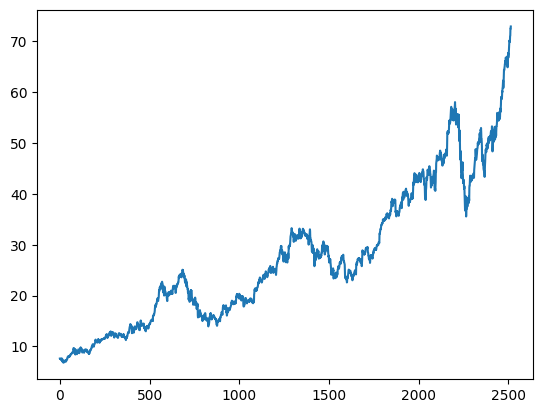

In [10]:
plt.plot(df.Close)

In [11]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

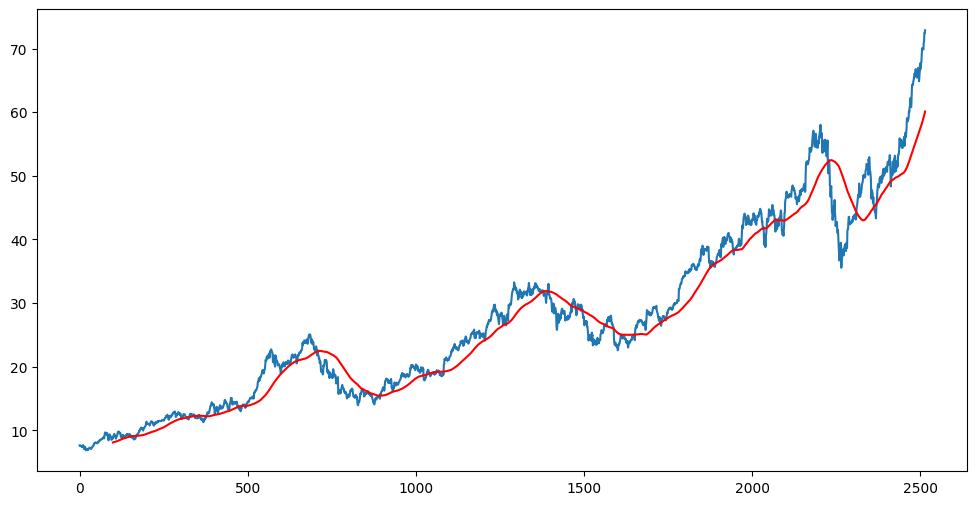

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')

In [13]:
ma200=df.Close.rolling(100).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

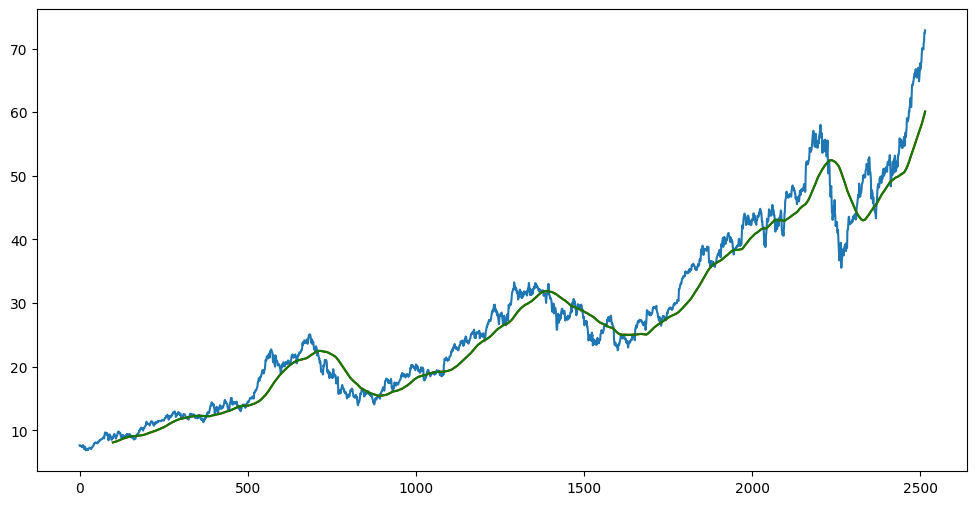

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [15]:
df.shape

(2515, 5)

# Splitting Data into training and testing 70% 30%

In [16]:
train=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(train.shape)
print(test.shape)

(1760, 1)
(755, 1)


In [17]:
train.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [18]:
test.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


# Scale training data :  minmaxscaler

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
train_array= scaler.fit_transform(train)
train_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [21]:
train_array.shape

(1760, 1)

# divide into x_train y_train

In [22]:
x_train=[]
y_train = []


for i in range(100,train_array.shape[0] ):
    x_train.append(train_array[i-100:i])
    y_train.append(train_array[i, 0])

x_train , y_train = np.array(x_train) , np.array(y_train)

In [25]:
x_train.shape

(1660, 100, 1)

# ML model

In [24]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [26]:
model = Sequential()

model.add(LSTM(units = 50, activation ='relu' , return_sequences=True, input_shape = (x_train.shape[1], 1 )  )) # with only close column so 1 
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation ='relu' , return_sequences=True ))  
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation ='relu' , return_sequences=True )) 
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation ='relu'  ))
model.add(Dropout(0.5))

model.add(Dense(units= 1 ))


c:\Users\sahar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam' , loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50 )

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - loss: 0.1491
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.0147
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0113
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0117
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0098
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0098
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0084
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0095
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0102
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0083
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0072
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0077
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0076
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.0079
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss

In [30]:
model.save('keras_model.h5')

# Predictions 

In [36]:
test.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [34]:
train.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [40]:
past_100_days = train.tail(100)
past_100_days

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [41]:
final_df = pd.concat([past_100_days, test], ignore_index=True)

In [43]:
final_df.head(100)

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000
...,...
95,29.264999
96,29.072500
97,29.129999
98,29.315001


In [44]:
input_data = scaler.fit_transform(final_df) # [0,1]

In [45]:
input_data.shape

(855, 1)

In [47]:
x_test = []
y_test =  []

for i in range(100,input_data.shape[0] ):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test) , np.array(y_test)

In [48]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step


In [49]:
y_predicted.shape

(755, 1)

In [50]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [51]:
y_predicted

array([[0.08705673],
       [0.08787113],
       [0.08866468],
       [0.08941674],
       [0.09011278],
       [0.09074458],
       [0.09131813],
       [0.09185258],
       [0.09236929],
       [0.09288788],
       [0.0934186 ],
       [0.09396085],
       [0.09452149],
       [0.09510562],
       [0.09571177],
       [0.09633535],
       [0.09697124],
       [0.09761208],
       [0.0982618 ],
       [0.0989314 ],
       [0.09962648],
       [0.10034585],
       [0.10108086],
       [0.10187301],
       [0.10278627],
       [0.1038658 ],
       [0.10514915],
       [0.10666811],
       [0.10844323],
       [0.11048129],
       [0.11277108],
       [0.11529671],
       [0.11805201],
       [0.12103091],
       [0.1242162 ],
       [0.12758315],
       [0.13110985],
       [0.13477476],
       [0.13854434],
       [0.14237888],
       [0.14623871],
       [0.15008442],
       [0.15391146],
       [0.15771435],
       [0.16149351],
       [0.16524221],
       [0.16895102],
       [0.172

In [52]:
scaler.scale_

array([0.02123255])

In [53]:
scale_factor =  1/0.02123255
y_predicted = y_predicted* scale_factor

y_test = y_test * scale_factor

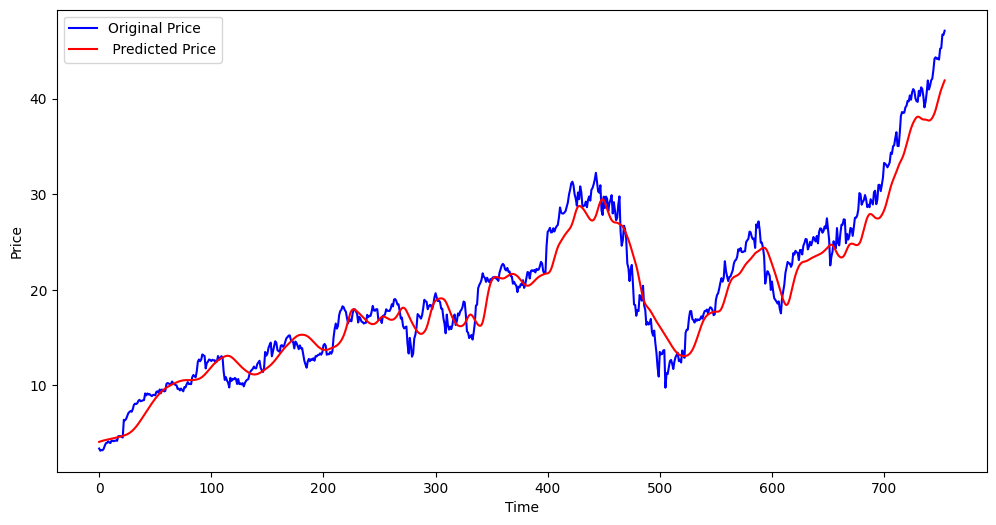

In [54]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = ' Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price')

plt.legend()

plt.show()
